# ePPR - extended Projection Pursuit Regression
# $$\hat{y}_i=\bar{y}+\sum_{d=0}^D\sum_{m=1}^{M_d}\beta_{m,d}\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})$$
# with    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})=0$,    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}^2(\alpha_{m,d}^Tx_{i-d})=1$
# by minimizing    $f=\sum_{i=1}^n(y_i-\hat{y}(x_i))^2+\lambda\sum_{d=0}^D\sum_{m=1}^{M_d}\Vert{L\alpha_{m,d}}\Vert^2$
___
### References
Rapela, J., Felsen, G., Touryan, J., Mendel, J.M., and Grzywacz, N.M. (2010). ePPR: a new strategy for the characterization of sensory cells from input/output data. Network: Computation in Neural Systems 21, 35–90.

Friedman, J.H., and Stuetzle, W. (1981). Projection Pursuit Regression. Journal of the American Statistical Association 76, 817–823.
___

## Simulated Data
#### X: Natural Images
#### Y: Simulated Neuron with MFR=0.56, MIF=4.26

In [1]:
using Revise,FileIO
simdata=load("./simdata.jld");x=simdata["x"];y=simdata["y"];imagesize=(16,16);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6b3a5b6c8f72e1db63ba57a141aa78843507c519-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6b3a5b6c8f72e1db63ba57a141aa78843507c519-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 3 listeners. Value:
12000), Observable{Int64} with 3 listeners. Value:
12000, Scope("knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe", Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 3 listeners. Value:
12000, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\Alex\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":12000}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n    

Observable{Any} with 0 listeners. Value:
Gray{Float64}[Gray{Float64}(0.360784) Gray{Float64}(0.47451) … Gray{Float64}(0.333333) Gray{Float64}(0.313725); Gray{Float64}(0.352941) Gray{Float64}(0.466667) … Gray{Float64}(0.32549) Gray{Float64}(0.309804); … ; Gray{Float64}(0.262745) Gray{Float64}(0.258824) … Gray{Float64}(0.0901961) Gray{Float64}(0.0901961); Gray{Float64}(0.258824) Gray{Float64}(0.247059) … Gray{Float64}(0.0784314) Gray{Float64}(0.0823529)]
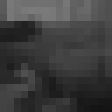
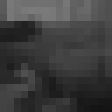

Observable{Any} with 0 listeners. Value:
5

In [2]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),observe(i))
yvalue = map(j->y[j],observe(i))
display.([i,xvalue,yvalue]);

## ePPR with Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 11112.474630241066, PenaltyLoss: 305.0251633942325.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1104500621411073
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10814.600713713407, PenaltyLoss: 60.50797730472669.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.6838390522108613
                                 step is λ = 0
New Term 3th iteration. TermLoss: 10610.756277362336, PenaltyLoss: 60.01142123258132.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.7149549224196312
                                 step is λ = 0
New Term 4th iteration. TermLoss: 10392.78564357605, PenaltyLoss: 68.53256950264608.
NewtonTrustRegion 

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9793526230076446
                                 step is λ = 0
New Term 3th iteration. TermLoss: 7656.510473072265, PenaltyLoss: 2.5891103211783437.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = -0.030963592558492924
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.25
                                 ρ = -0.030963592558492924
                                 step is λ = 0
NewtonTrustRegion 3th iteration, r = 0.0625
                                 ρ = 0.1527537726079026
                                 step is easy
NewtonTrustRegion 4th iteration, r = 0.015625
                                 ρ = 0.8207892371442946
                                 step is easy
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 2.3700582130008145e-5.
Fit (Temporal-2, Spatial-3) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 763

Refit (Temporal-2, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 7491.101074936125, PenaltyLoss: 5.109099837713823.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.502193566907574
                                 step is easy
New Term 2th iteration. TermLoss: 7480.15409002671, PenaltyLoss: 7.155672723697108.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = -0.10805515331772589
                                 step is easy
NewtonTrustRegion 2th iteration, r = 0.015625
                                 ρ = 0.4925007246832676
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00042307317470852314.
ePPR Backward Stepwise ...


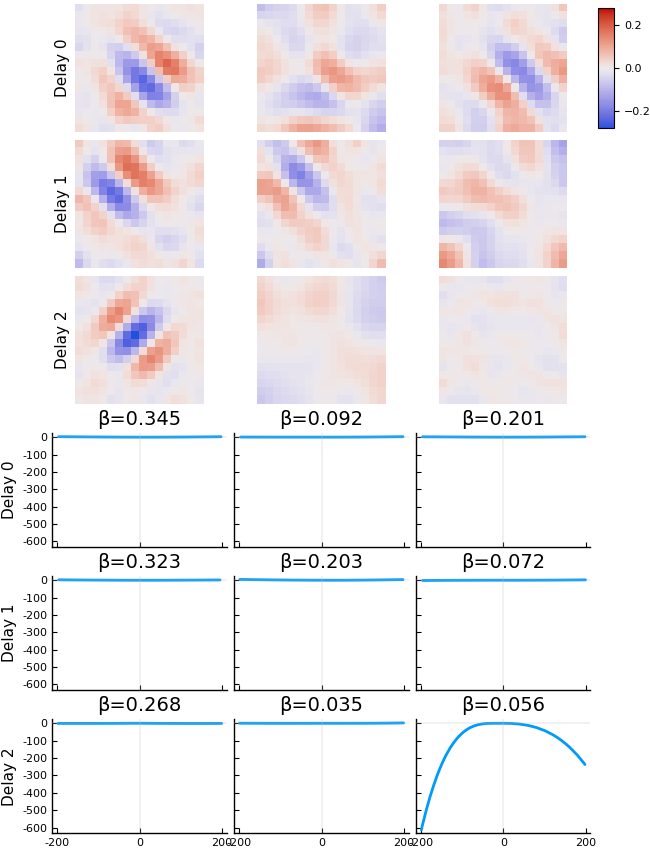

Drop Term: (temporal-2, spatial-2) with β: 0.03508814821345987.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.344711, 0.0921174, 0.200972, 0.322551, 0.202862, 0.0716351, 0.267744, 0.0563408]
New βs: [0.362249, 0.101801, 0.212815, 0.336417, 0.225287, 0.0937336, 0.269932, 0.0699393]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7478.911998948877, PenaltyLoss: 76.11352886162574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.95573245216075
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7476.526763924106, PenaltyLoss: 77.65610872389324.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9445910915689347
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.182527021627703e-5.
Model Loss increased from 7844.408378896556 to 7847.843956123814. Discard the new term, keep the old one.
Refit (Temporal-0, Spati

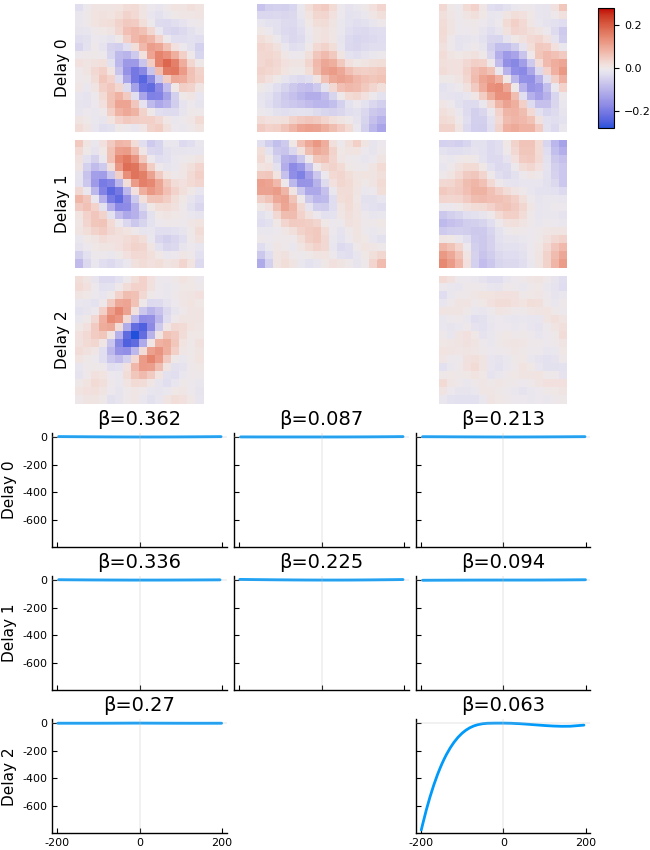

Drop Term: (temporal-2, spatial-3) with β: 0.06343992660884168.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.362249, 0.0869607, 0.212815, 0.336417, 0.225287, 0.0937336, 0.269932]
New βs: [0.36445, 0.100538, 0.214526, 0.33596, 0.224785, 0.0934616, 0.276984]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7520.241100791904, PenaltyLoss: 76.11352886162574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.962389949938516
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7517.573583766673, PenaltyLoss: 77.88739749600342.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9406094183366753
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.2740322849524457e-5.
Model Loss increased from 7875.313087050655 to 7878.6809614403055. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
Ne

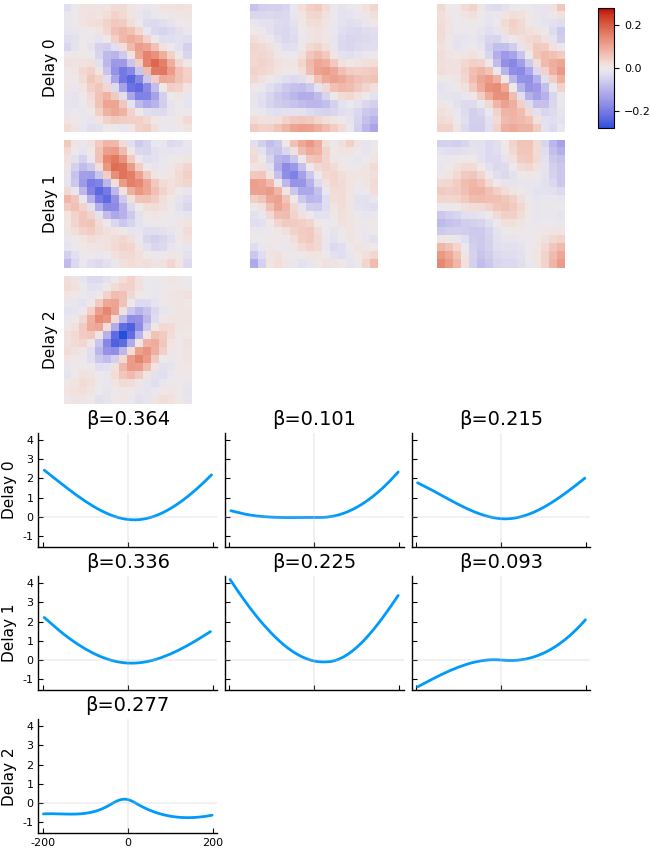

Drop Term: (temporal-1, spatial-3) with β: 0.09346164428646263.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.36445, 0.100538, 0.214526, 0.33596, 0.224785, 0.276984]
New βs: [0.36333, 0.100832, 0.21426, 0.323985, 0.22299, 0.276717]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7592.360020283094, PenaltyLoss: 76.11352886162574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9559039882233692
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7590.068049235356, PenaltyLoss: 77.51594838623551.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9525650994641257
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.2663807989351854e-5.
Model Loss increased from 7934.076373248323 to 7937.104327617118. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. Term

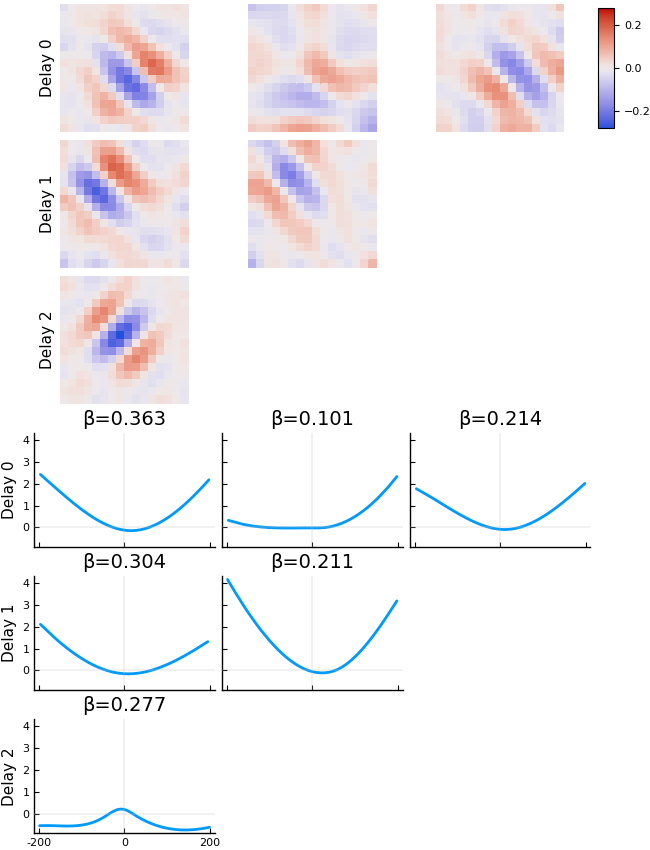

Drop Term: (temporal-0, spatial-2) with β: 0.1008319985196707.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.36333, 0.21426, 0.304283, 0.21079, 0.276717]
New βs: [0.369308, 0.237644, 0.324798, 0.227885, 0.276184]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7644.284632501665, PenaltyLoss: 76.11352886162574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9645527165743197
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7633.694159163458, PenaltyLoss: 80.99105291932378.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.957633366647816
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.486464614234972e-5.
Refit (Temporal-0, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 7620.073497942763, PenaltyLoss: 49.84681530137929.
NewtonTrustRegion 1th iteration, r = 1.0
                             

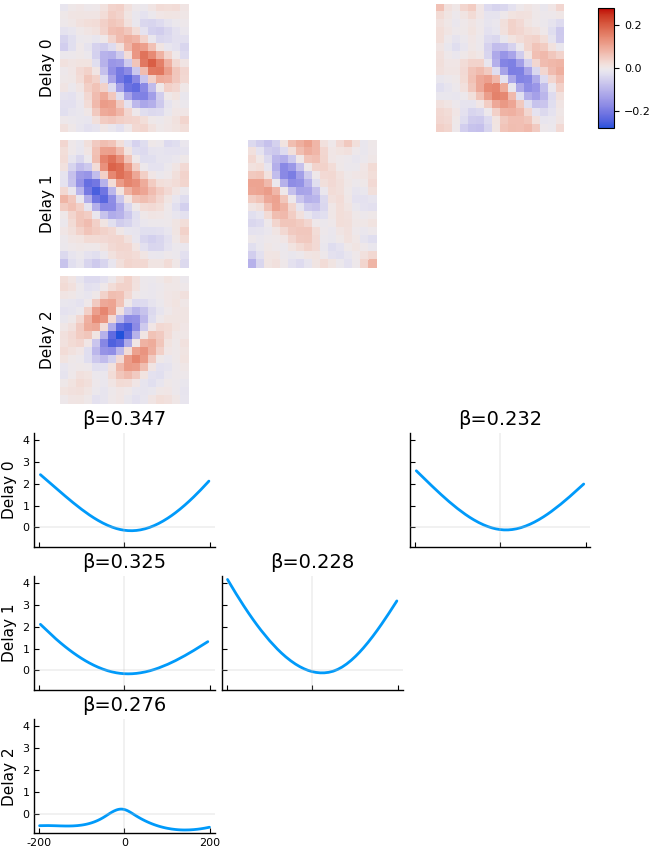

Drop Term: (temporal-1, spatial-2) with β: 0.2278847081021654.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.346764, 0.231774, 0.324798, 0.276184]
New βs: [0.364949, 0.248038, 0.371073, 0.277929]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8013.9826056416905, PenaltyLoss: 81.7317965248788.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9135876409740519
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8005.630904899926, PenaltyLoss: 85.00122894877337.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8923545157672471
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.3048758387871063e-5.
Refit (Temporal-0, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 8008.387338743264, PenaltyLoss: 58.43209583177707.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.03991

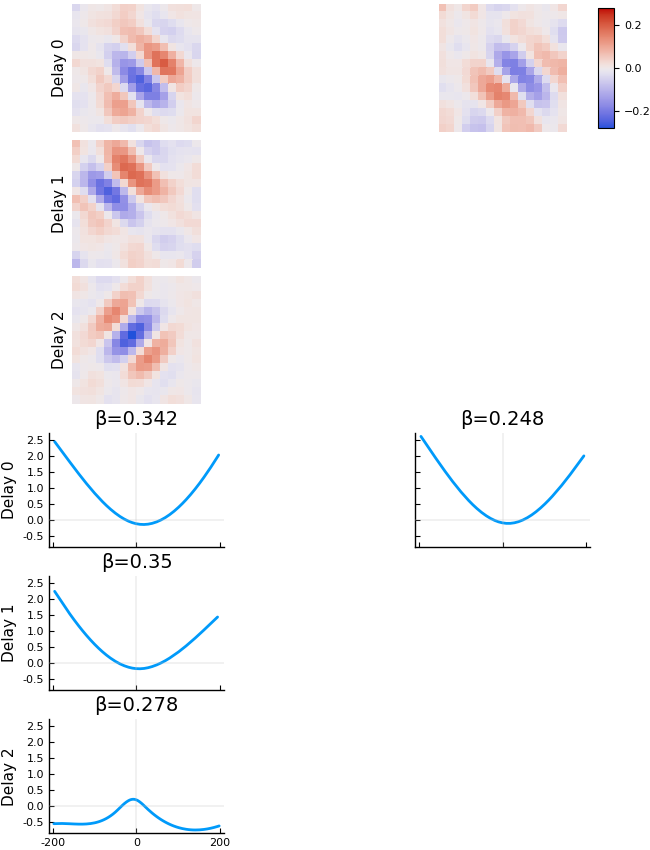

Drop Term: (temporal-0, spatial-3) with β: 0.2480378441923653.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.342212, 0.349752, 0.277929]
New βs: [0.416066, 0.375653, 0.277746]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8474.50395260164, PenaltyLoss: 85.64232338939357.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1074195990945181
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8424.516776452683, PenaltyLoss: 95.81319924902496.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.443208829246311
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8421.283040674864, PenaltyLoss: 96.9524663010117.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.4864105196053994
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00020810653787404338.
Refit 

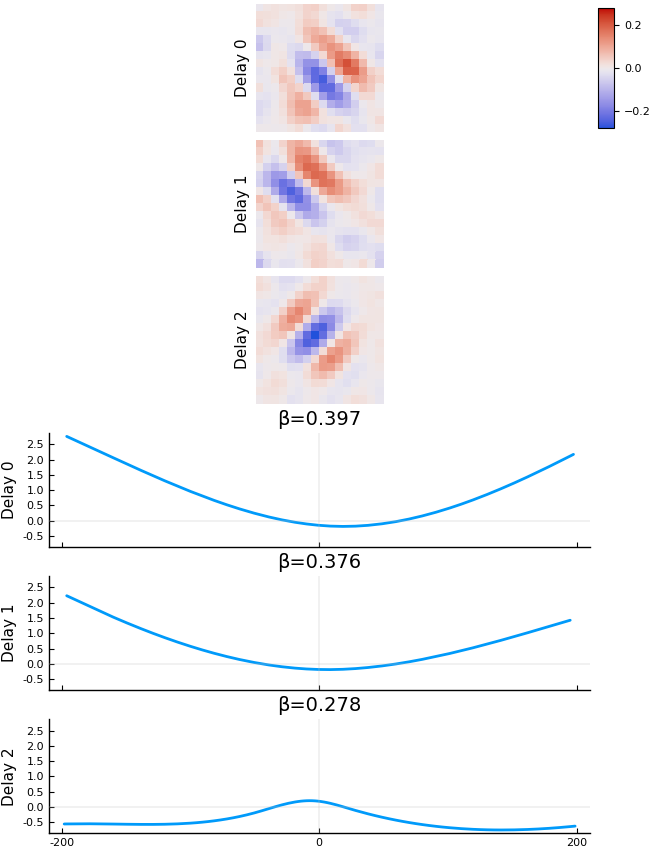

Drop Term: (temporal-2, spatial-1) with β: 0.2777456284023846.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.396876, 0.375653]
New βs: [0.426615, 0.376974]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 9071.412023206592, PenaltyLoss: 98.11801923672571.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2440263282017368
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9066.220927790884, PenaltyLoss: 102.30633056949537.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.3886426871599227
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00010306366448078661.
Model Loss increased from 9241.061234398285 to 9246.06477763636. Discard the new term, keep the old one.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 9073.203105090191, PenaltyLoss: 76.29517418357095.
NewtonTrustRegion 

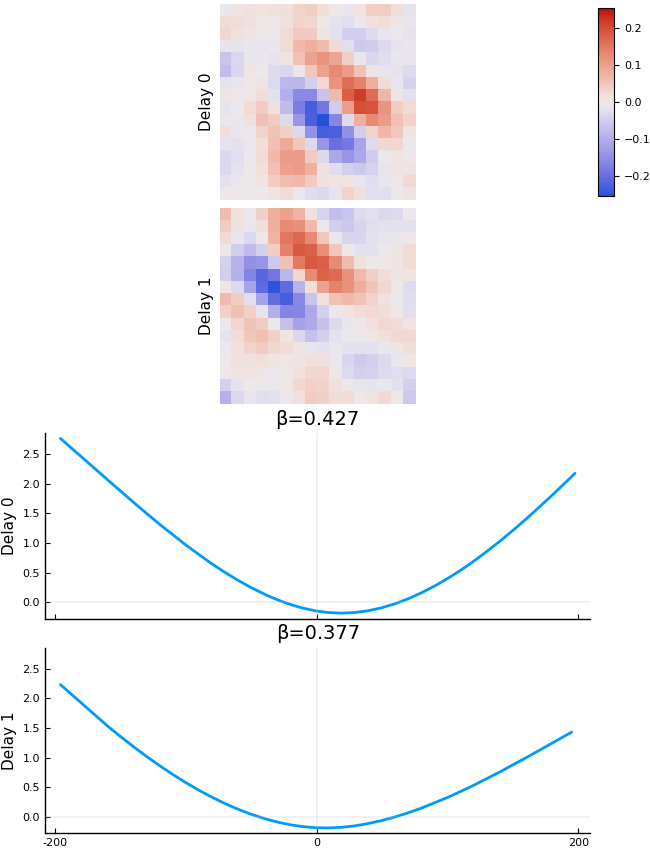

Drop Term: (temporal-1, spatial-1) with β: 0.37697403335207325.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.426615]
New βs: [0.431418]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10270.621185093521, PenaltyLoss: 98.11801923672571.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0945678515533859
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10261.290237642761, PenaltyLoss: 104.11750011947386.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.3229107643151843
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 8.667530507207621e-5.
Model Loss increased from 10365.040457225887 to 10366.800715108522. Discard the new term, keep the old one.


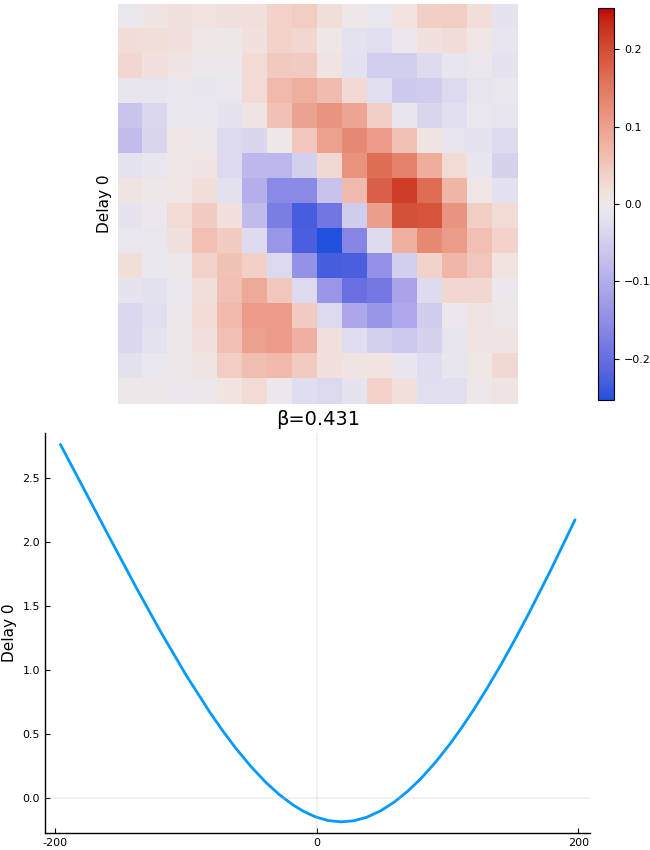

ePPR Models Cross Validation ...


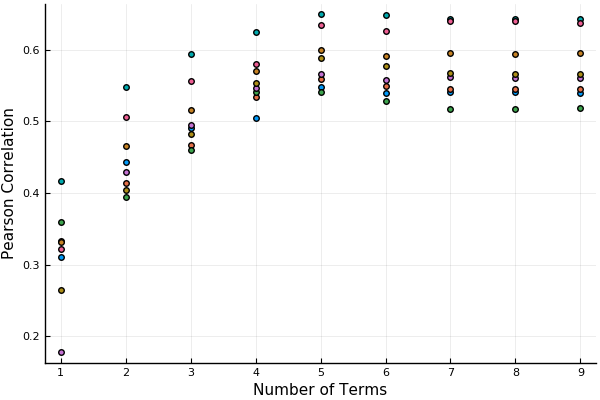

5th model with 5 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-1, Spatial-1) New Term ...
Fit Model (Temporal-1, Spatial-2) New Term ...
Fit Model (Temporal-2, Spatial-1) New Term ...
Refit Model βs ...
Old βs: [0.39626, 0.217491, 0.34665, 0.202653, 0.226007]
New βs: [0.366924, 0.247164, 0.324126, 0.227233, 0.277517]
Cross Validated ePPR Done.


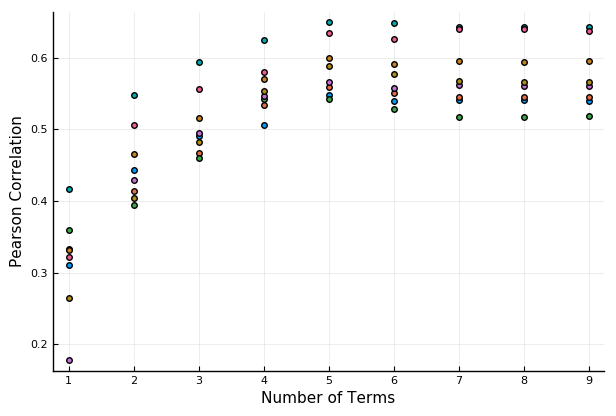

In [5]:
using ePPR
hp=ePPRHyperParams(imagesize...,nft=[3,3,3])
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y,hp,debug);

### Final Model

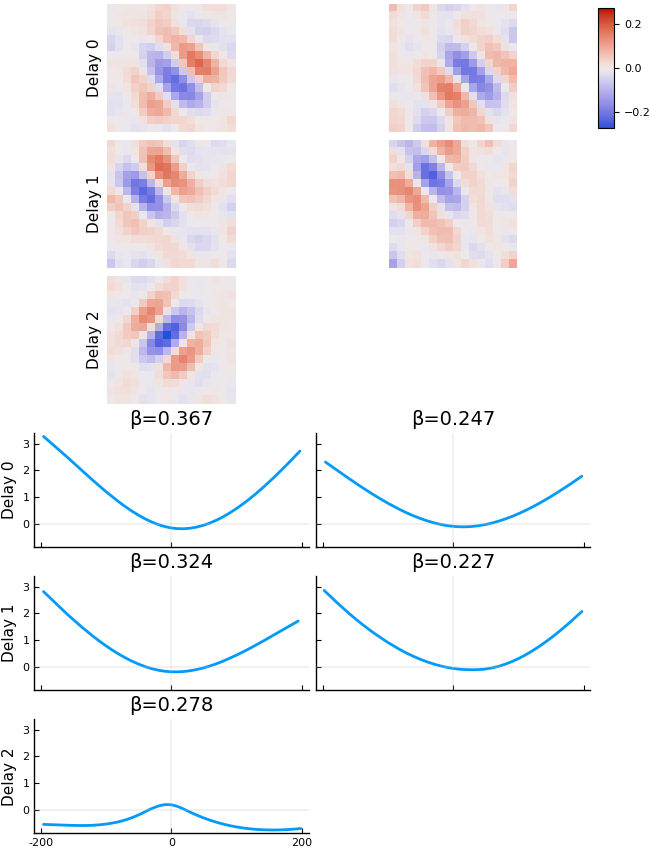

In [6]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
Nonlinear Time Interaction, pool x[i-2:i, :] together ...
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 10486.089699581762, PenaltyLoss: 156.77090671095823.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2746563991252011
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9640.550806522482, PenaltyLoss: 132.02578049747558.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.7062023292569712
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8775.964617987005, PenaltyLoss: 170.02325382643406.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.4667178408986112
                                 step is λ = 0
New Term 4th iteration. TermLoss: 8157.29956

New Term 1th iteration. TermLoss: 5884.74553521948, PenaltyLoss: 64.37548814429371.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.7655254463368991
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5854.558420648588, PenaltyLoss: 40.66302523419546.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6947026395682656
                                 step is λ = 0
New Term 3th iteration. TermLoss: 5847.8100966244165, PenaltyLoss: 39.3515036157919.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.5769656797304226
                                 step is λ = 0
New Term 4th iteration. TermLoss: 5846.38331448029, PenaltyLoss: 39.25392132724007.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.5627191508933422
                                 step is λ = 0
New Term converged in 4 iterations with (lossₒ-lossₙ)/lossₒ = 7.462817096784352e-5.
Re

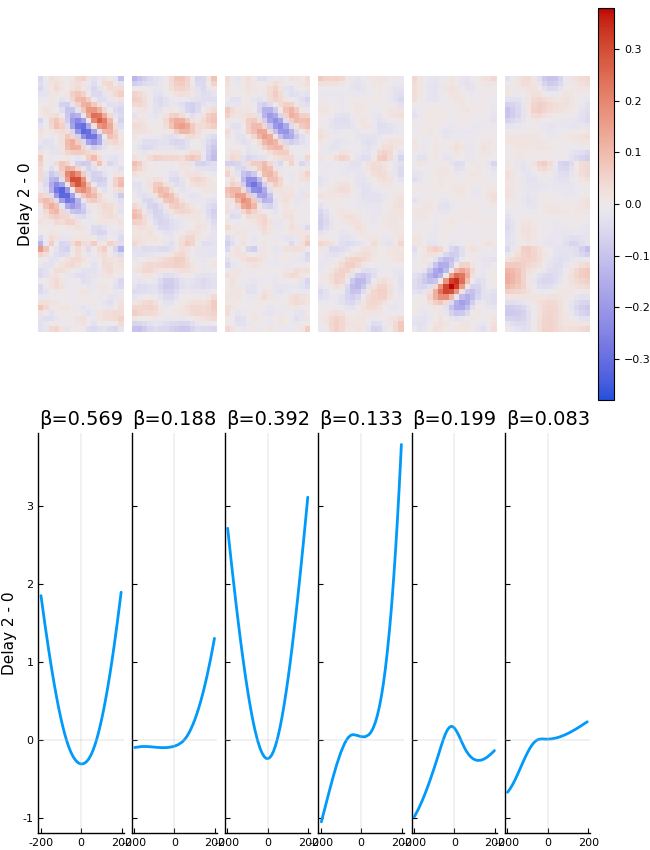

Drop Term: (temporal-0, spatial-6) with β: 0.08282112437569751.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.569042, 0.187753, 0.391973, 0.13304, 0.198775]
New βs: [0.601939, 0.159131, 0.421179, 0.135736, 0.232575]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 5823.046535943877, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9674251211251391
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5821.615104594111, PenaltyLoss: 213.51527009910404.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9804477661958492
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001854032565236573.
Model Loss increased from 6267.3098823219325 to 6288.370282959902. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 5794.77

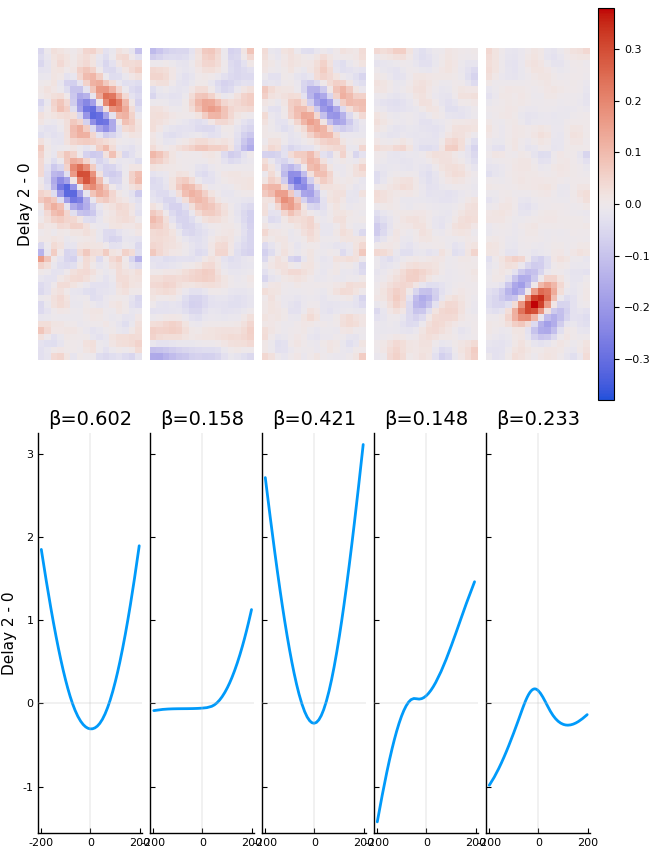

Drop Term: (temporal-0, spatial-4) with β: 0.14793521630732942.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.601939, 0.157649, 0.421179, 0.232575]
New βs: [0.589255, 0.12779, 0.410167, 0.247429]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 5939.755825544922, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9555943568429365
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5926.902214735913, PenaltyLoss: 217.4222659989682.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9611761829638452
                                 step is λ = 0
New Term 3th iteration. TermLoss: 5928.658685271501, PenaltyLoss: 219.5772770485938.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9682178373415623
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001

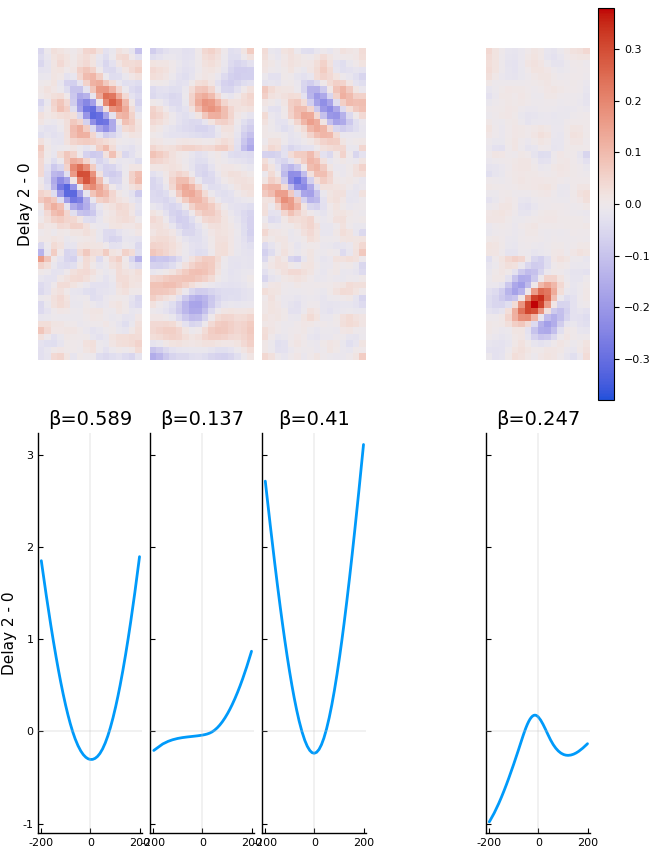

Drop Term: (temporal-0, spatial-2) with β: 0.13710075890841855.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.589255, 0.410167, 0.247429]
New βs: [0.602926, 0.428007, 0.24681]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 6072.722979274849, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9916355157201358
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6061.020537855273, PenaltyLoss: 216.8357027020794.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9765544135460438
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6062.806136759805, PenaltyLoss: 219.3082444147495.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9738563434260744
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00018464230004185096.
Mo

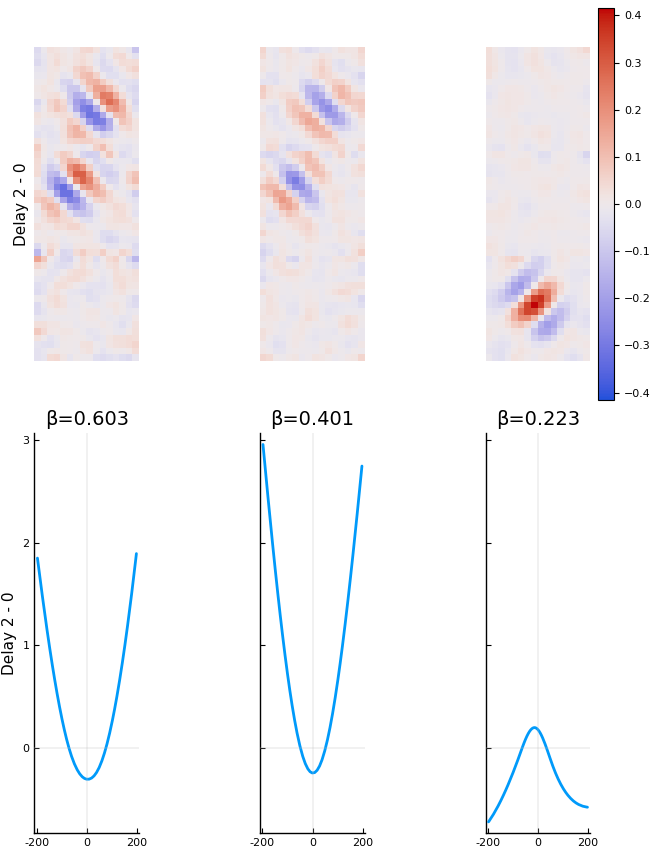

Drop Term: (temporal-0, spatial-5) with β: 0.22281073835644244.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.602926, 0.401369]
New βs: [0.604304, 0.430011]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 6542.290471908094, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.96931542261662
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6516.906184903098, PenaltyLoss: 227.9414192730401.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9215985732620795
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6518.376508251668, PenaltyLoss: 230.49824947291006.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.964079742508162
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00017073173411040376.
Model Loss increased fr

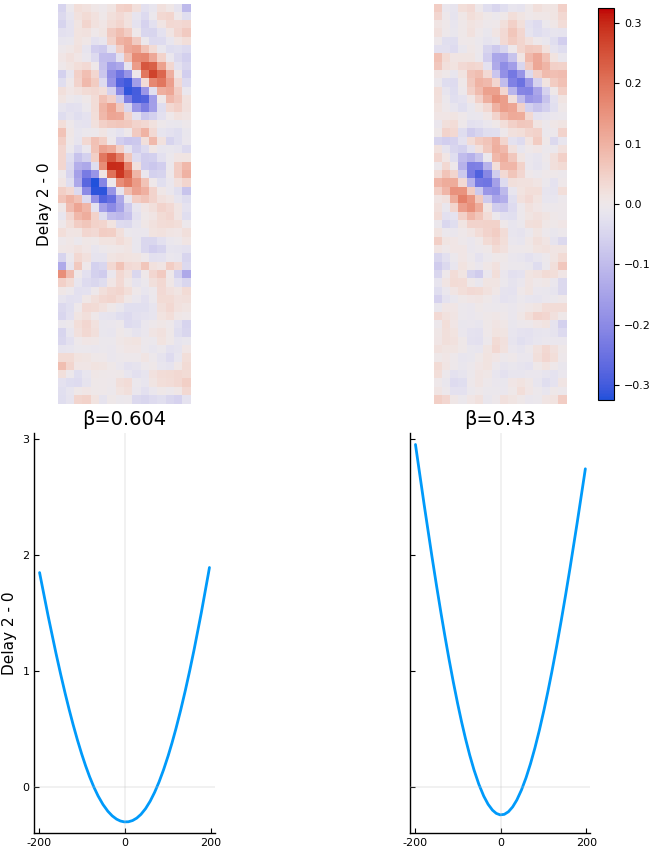

Drop Term: (temporal-0, spatial-3) with β: 0.43001117439717856.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.604304]
New βs: [0.668613]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8087.376402214405, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.038270463958484
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8008.588565973064, PenaltyLoss: 238.0821748413653.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0474495118929896
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8009.379732978903, PenaltyLoss: 241.15369842797688.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0466664481599053
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00023596737452065273.


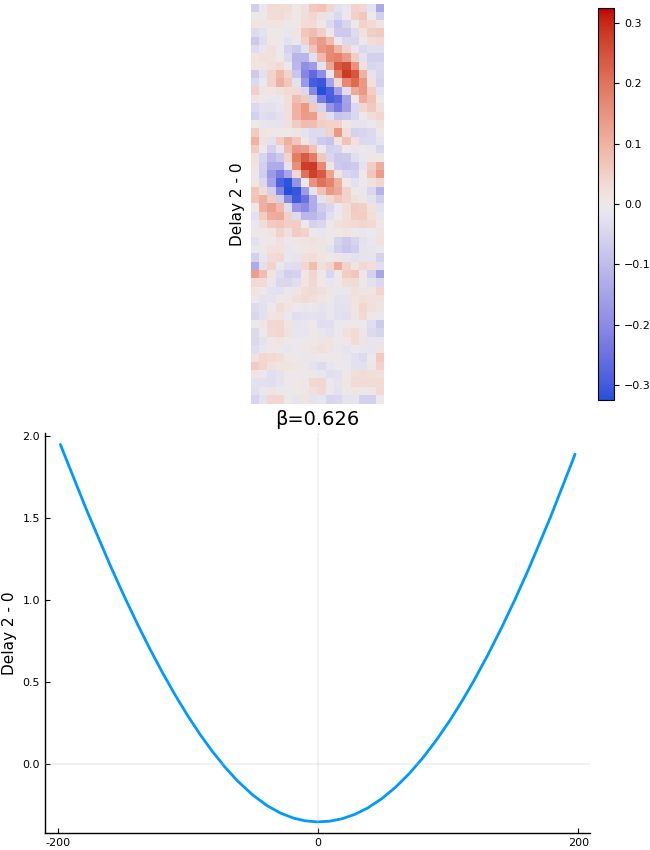

ePPR Models Cross Validation ...


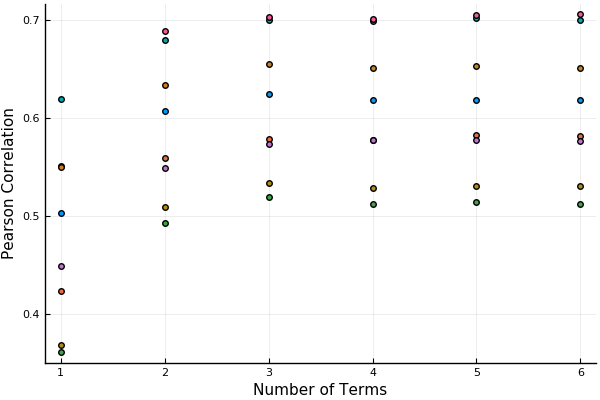

3th model with 3 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-0, Spatial-3) New Term ...
Refit Model βs ...
Old βs: [0.619553, 0.393692, 0.222972]
New βs: [0.599627, 0.431602, 0.267254]
Cross Validated ePPR Done.


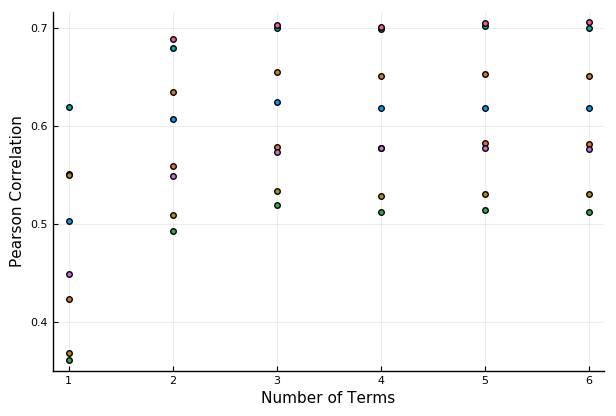

In [7]:
using ePPR
hp=ePPRHyperParams(imagesize...,ndelay=3,lambda=15,nft=[6])
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y,hp,debug);

### Final Model

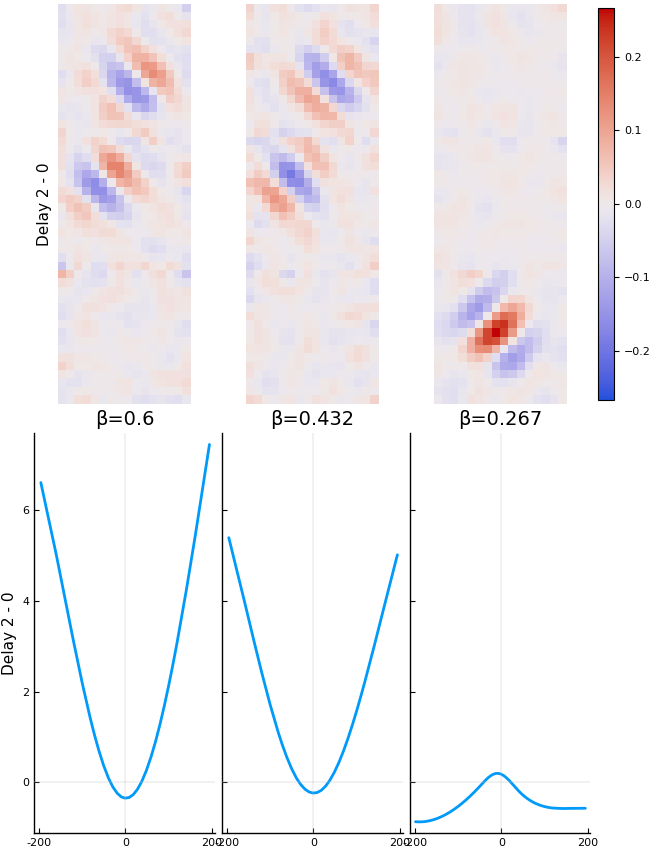

In [8]:
plotmodel(model,hp)

## Data Recorded from an Anesthetized Cat
#### X: Natural Images each present 40ms
#### Y1: Neuron Spike Sum
#### Y2: Neuron Spike Sum

In [ ]:
using Revise,FileIO
data=load("./data.jld");x=data["x"];y1=data["y1"];y2=data["y2"];imagesize=(12,12);

In [ ]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),observe(i))
y1value = map(j->y1[j],observe(i))
y2value = map(j->y2[j],observe(i))
display.([i,xvalue,y1value,y2value]);

## ePPR with Linear Time Interaction

In [ ]:
using ePPR
hp=ePPRHyperParams(imagesize...)
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y1,hp,debug);

### Final Model

In [ ]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

In [ ]:
hp=ePPRHyperParams(imagesize...,ndelay=3,lambda=60,nft=[6])
model,models = epprcv(x,y2,hp,debug);

### Final Model

In [ ]:
plotmodel(model,hp)

## Benchmark

In [ ]:
using BenchmarkTools
@btime model,models = epprcv(x,y,hp);